In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn

from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

(array([  3.,   3.,  11.,   7.,  24.,  17.,  15.,  13.,   4.,   3.]),
 array([-2.99888229, -2.44224767, -1.88561305, -1.32897842, -0.7723438 ,
        -0.21570918,  0.34092544,  0.89756006,  1.45419468,  2.0108293 ,
         2.56746393]),
 <a list of 10 Patch objects>)

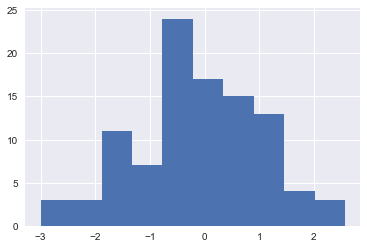

In [2]:
#Create a random normal-dist dataset
dataset1 = randn(100)

#Plot a histogram of the dataset, note bins=10 by default
plt.hist(dataset1)

(array([  1.,   2.,   6.,  15.,  17.,  15.,  15.,   6.,   2.,   1.]),
 array([-2.36635556, -1.86796637, -1.36957719, -0.871188  , -0.37279881,
         0.12559037,  0.62397956,  1.12236875,  1.62075794,  2.11914712,
         2.61753631]),
 <a list of 10 Patch objects>)

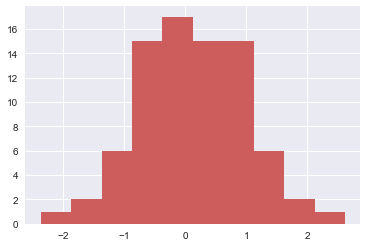

In [3]:
# Lets make another dataset
dataset2 = randn(80)

#Plot
plt.hist(dataset2,color='indianred')

(array([ 0.0501616 ,  0.        ,  0.0501616 ,  0.0501616 ,  0.15048481,
         0.15048481,  0.65210082,  0.1003232 ,  0.45145442,  0.40129282,
         0.45145442,  0.30096961,  0.35113121,  0.40129282,  0.20064641,
         0.1003232 ,  0.1003232 ,  0.        ,  0.        ,  0.0501616 ]),
 array([-2.36635556, -2.11716097, -1.86796637, -1.61877178, -1.36957719,
        -1.12038259, -0.871188  , -0.62199341, -0.37279881, -0.12360422,
         0.12559037,  0.37478497,  0.62397956,  0.87317415,  1.12236875,
         1.37156334,  1.62075794,  1.86995253,  2.11914712,  2.36834172,
         2.61753631]),
 <a list of 20 Patch objects>)

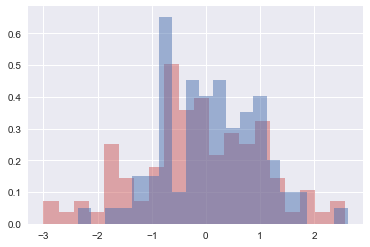

In [4]:
plt.hist(dataset1, normed = True, color = 'indianred',alpha = 0.5, bins = 20)
plt.hist(dataset2, normed = True, alpha = 0.5, bins = 20)

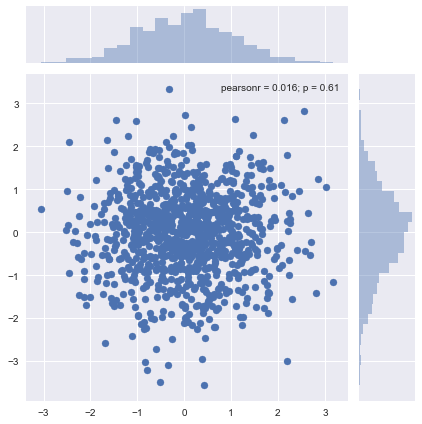

In [5]:
data1 = randn(1000)
data2 = randn(1000)
sns.jointplot(data1,data2)

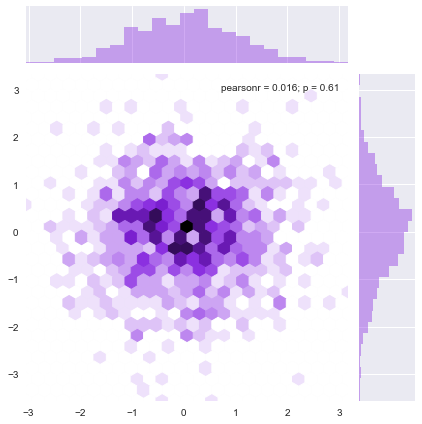

In [6]:
sns.jointplot(data1, data2, kind = 'hex', color = 'blueviolet')

(0, 1)

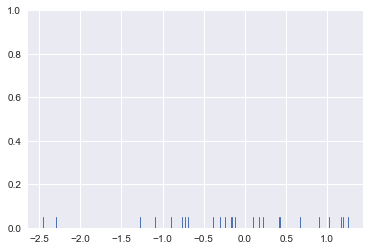

In [7]:
#Kernel Density Estimation Plots

dataset = randn(25)
sns.rugplot(dataset)
plt.ylim(0,1)

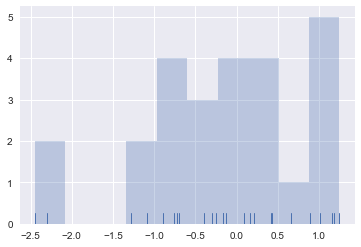

In [8]:
plt.hist(dataset,alpha = 0.3)
sns.rugplot(dataset)

(0, 1)

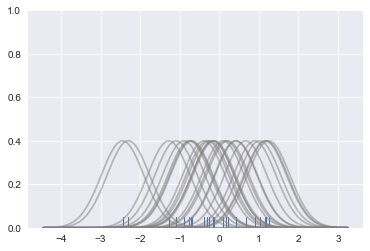

In [9]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4*dataset.std()**5) / (3*len(dataset))) ** 0.2

kernel_list = []

for data_point in dataset:
    #create a kernel for each point
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis, kernel, color = 'gray', alpha = 0.5)
    
plt.ylim(0,1)

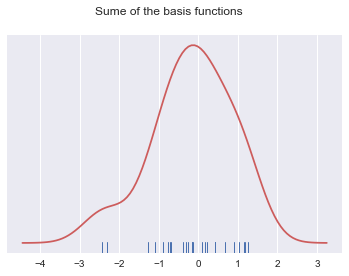

In [10]:
sum_of_kde = np.sum(kernel_list, axis = 0)
fig = plt.plot(x_axis, sum_of_kde, color = 'indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sume of the basis functions")

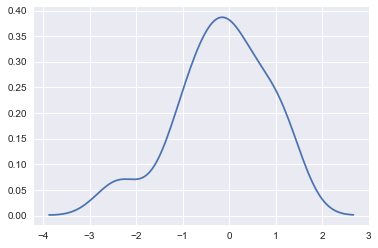

In [11]:
sns.kdeplot(dataset)

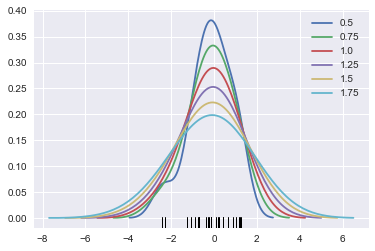

In [12]:
sns.rugplot(dataset, color = 'black')

for bw in np.arange(0.5,2, 0.25):
    sns.kdeplot(dataset, bw = bw, lw = 1.8, label = bw)
    

In [13]:
# More info on types
url = 'http://en.wikipedia.org/wiki/Kernel_(statistics)'

C:\Anaconda2\lib\site-packages\numpy\core\numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


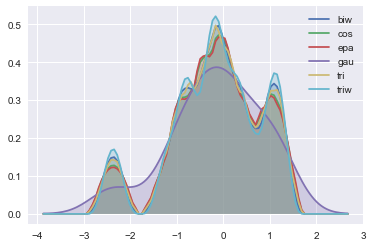

In [14]:
kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']

for kern in kernel_options:
    sns.kdeplot(dataset, kernel = kern, label = kern, shade = True)

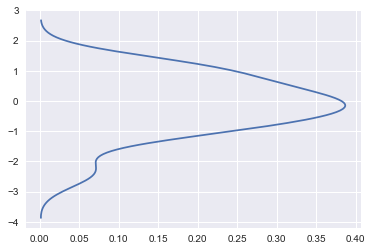

In [15]:
sns.kdeplot(dataset, vertical = True)

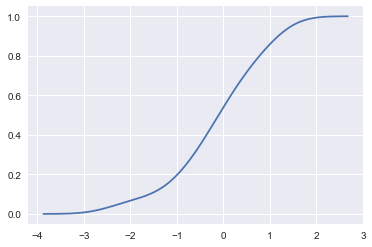

In [16]:
sns.kdeplot(dataset, cumulative = True)

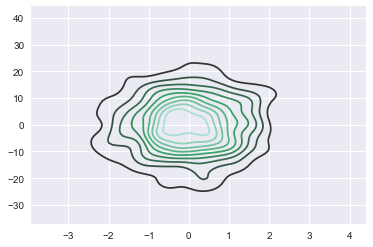

In [17]:
#Multidimensional
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean, cov, 1000)

dframe = pd.DataFrame(dataset2, columns = ['X','Y'])

sns.kdeplot(dframe)

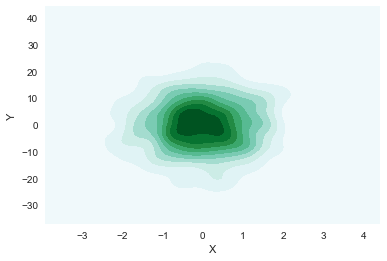

In [18]:
sns.kdeplot(dframe.X, dframe.Y, shade = True)

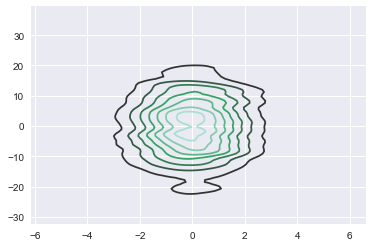

In [19]:
sns.kdeplot(dframe, bw=1)

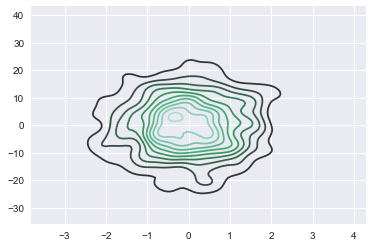

In [20]:
sns.kdeplot(dframe,bw='silverman')

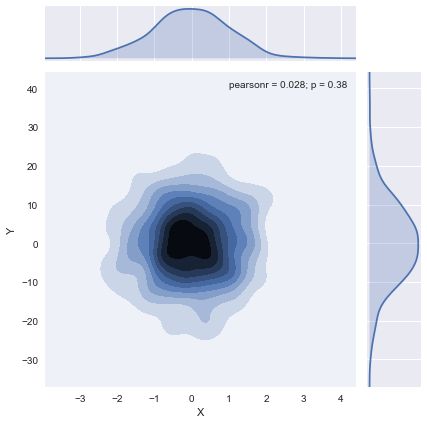

In [21]:
sns.jointplot('X', 'Y', dframe, kind = 'kde')

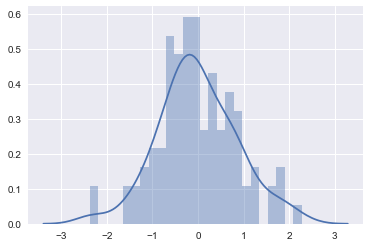

In [22]:
#combining plot styles
dataset = randn(100)
sns.distplot(dataset, bins = 25)

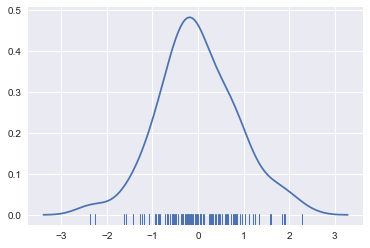

In [23]:
sns.distplot(dataset, bins= 25, rug = True, hist = False)

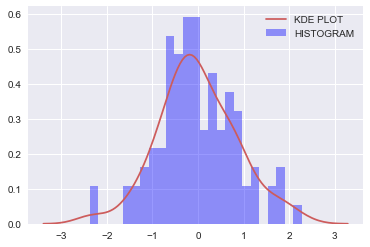

In [24]:
sns.distplot(dataset, bins = 25, 
           kde_kws={'color':'indianred','label':'KDE PLOT'},
             hist_kws={'color':'blue','label':"HISTOGRAM"})

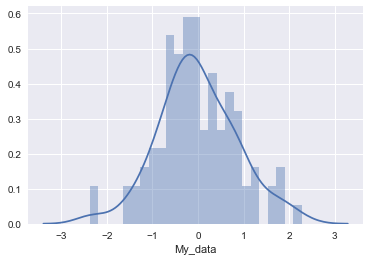

In [25]:
from pandas import Series

ser1 = Series(dataset, name = 'My_data')
sns.distplot(ser1, bins=25)

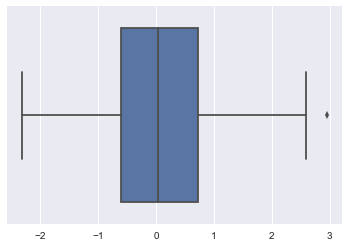

In [26]:
#box and violin plots
data1 = randn(100)
data2 = randn(100)

sns.boxplot([data1,data2])


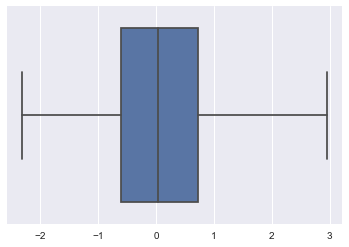

In [27]:
sns.boxplot([data1, data2], whis = np.inf)

C:\Anaconda2\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


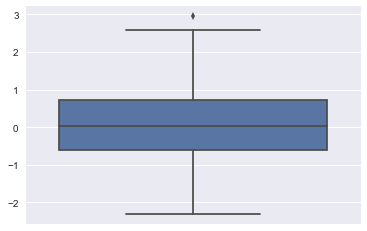

In [28]:
sns.boxplot([data1, data2], vert = True)

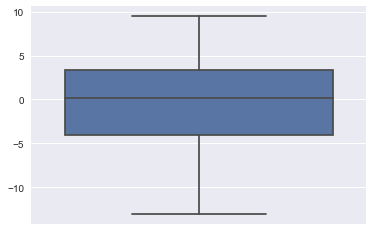

In [29]:
#normal dist
data1 = stats.norm(0,5).rvs(100)

#two gamma dist. concatendated together
data2 = np.concatenate([stats.gamma(5).rvs(50)-1, 
                        -1*stats.gamma(5).rvs(50)])

sns.boxplot([data1, data2], whis = np.inf, vert = True)

C:\Anaconda2\lib\site-packages\seaborn\categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


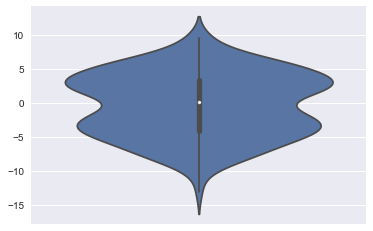

In [30]:
sns.violinplot([data1, data2], vert = True)

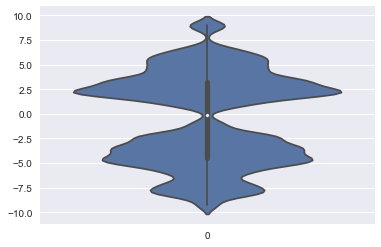

In [48]:
sns.violinplot(data =data2, bw =0.1)

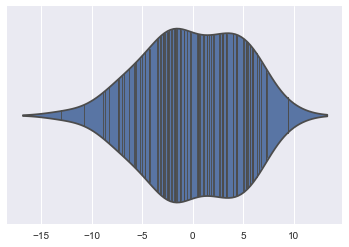

In [32]:
sns.violinplot(data1, inner = 'stick')

In [33]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


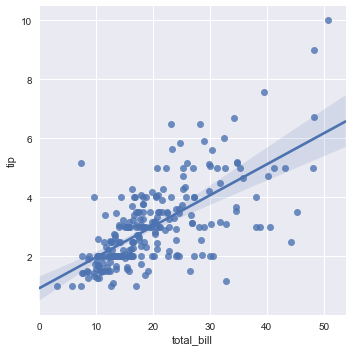

In [34]:
sns.lmplot('total_bill', 'tip', tips)

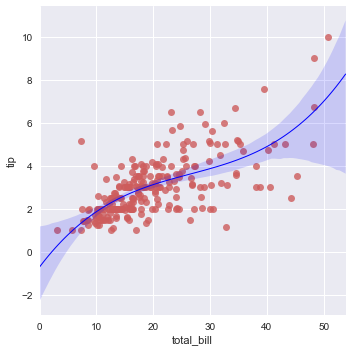

In [35]:
sns.lmplot('total_bill','tip',tips, order = 3,
           scatter_kws={'marker': 'o', 'color':'indianred'},
          line_kws = {'color': 'blue', 'linewidth': 1})

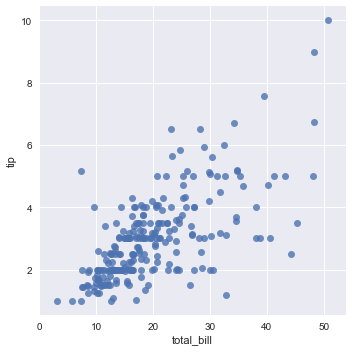

In [36]:
sns.lmplot('total_bill','tip',tips,fit_reg = False)

In [37]:
tips['tip_pect'] = 100*(tips['tip']/tips['total_bill'])

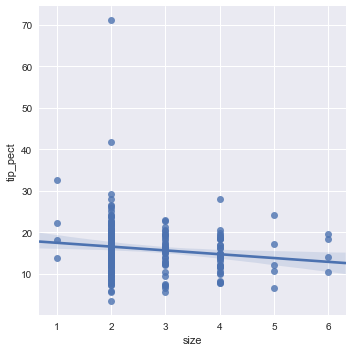

In [38]:
sns.lmplot('size', 'tip_pect', tips)

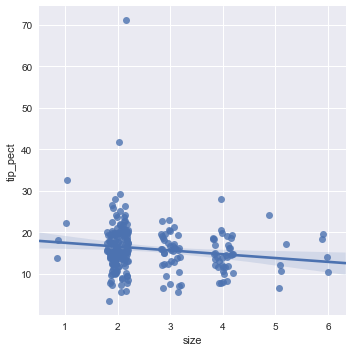

In [39]:
sns.lmplot('size', 'tip_pect', tips, x_jitter = .2)

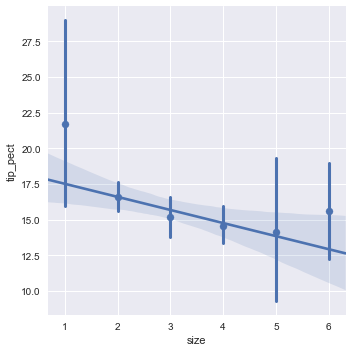

In [40]:
sns.lmplot('size','tip_pect', tips, x_estimator = np.mean)

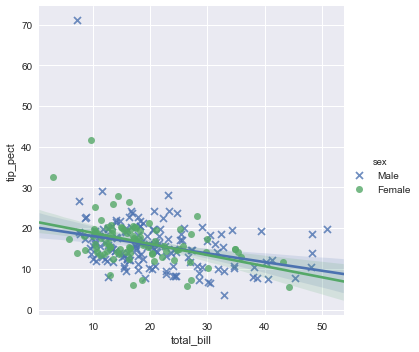

In [41]:
sns.lmplot("total_bill", "tip_pect", tips, hue="sex",markers=["x","o"])

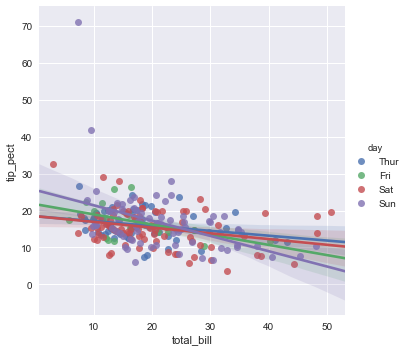

In [42]:
sns.lmplot('total_bill', 'tip_pect', tips, hue = 'day')

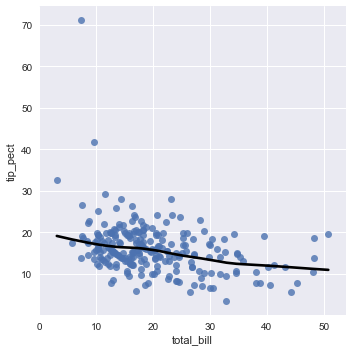

In [43]:
sns.lmplot('total_bill','tip_pect', tips, lowess = True, line_kws = {'color': 'black'})

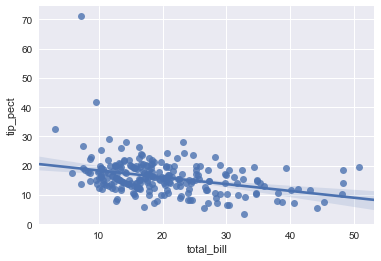

In [44]:
sns.regplot('total_bill', 'tip_pect', tips)

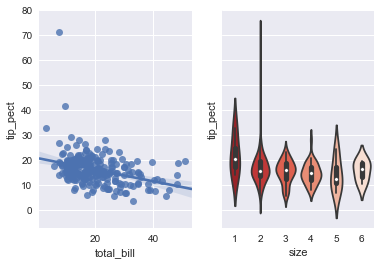

In [57]:
fig, (axis1,axis2) = plt.subplots(1,2,sharey =True)

sns.regplot("total_bill","tip_pect",tips,ax=axis1)
sns.violinplot(y=tips['tip_pect'],x=tips['size'],palette = 'Reds_r',ax=axis2)

In [16]:
#heatmaps and Clusters
flights_dframe = sns.load_dataset('flights')

In [17]:
flights_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [19]:
flight_dframe = flights_dframe.pivot('month', 'year', 'passengers')
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


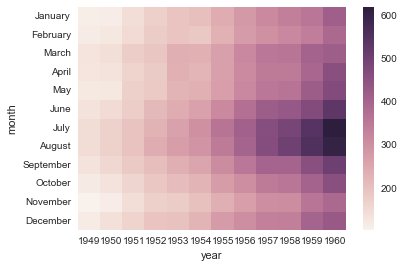

In [20]:
sns.heatmap(flight_dframe)

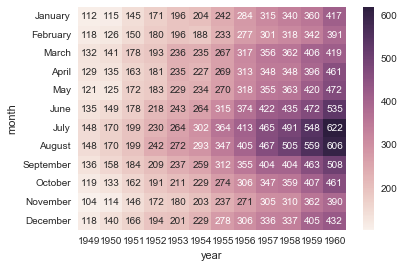

In [21]:
sns.heatmap(flight_dframe, annot= True, fmt = 'd')

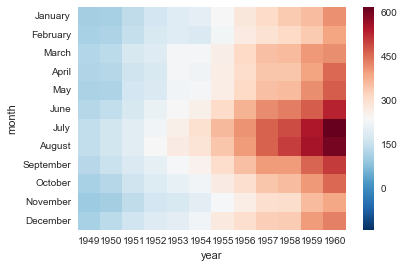

In [22]:
sns.heatmap(flight_dframe, center = flight_dframe.loc['January', 1955])

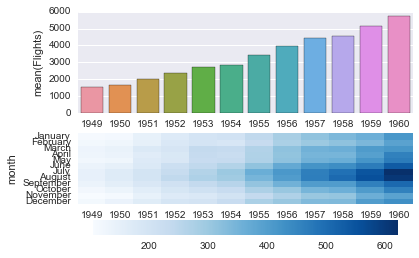

In [26]:
f, (axis1, axis2) = plt.subplots(2,1)

yearly_flights = flight_dframe.sum()

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

year_dframe = pd.concat((years, flights), axis = 1)
year_dframe.columns = ['Year', 'Flights']

sns.barplot('Year', y = 'Flights', data=year_dframe, ax=axis1)

sns.heatmap(flight_dframe, cmap = 'Blues', ax=axis2, cbar_kws={'orientation':'horizontal'})

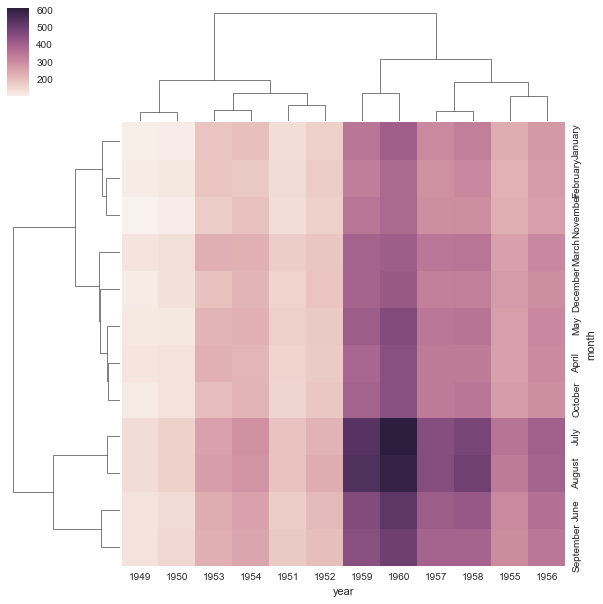

In [27]:
sns.clustermap(flight_dframe)

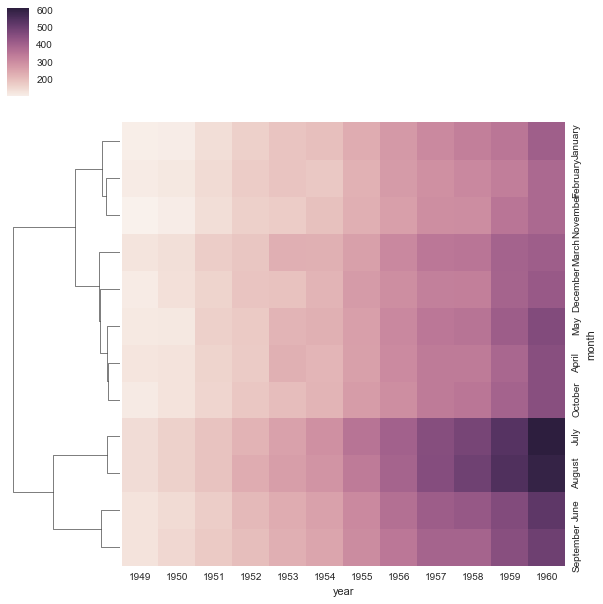

In [28]:
sns.clustermap(flight_dframe, col_cluster = False)

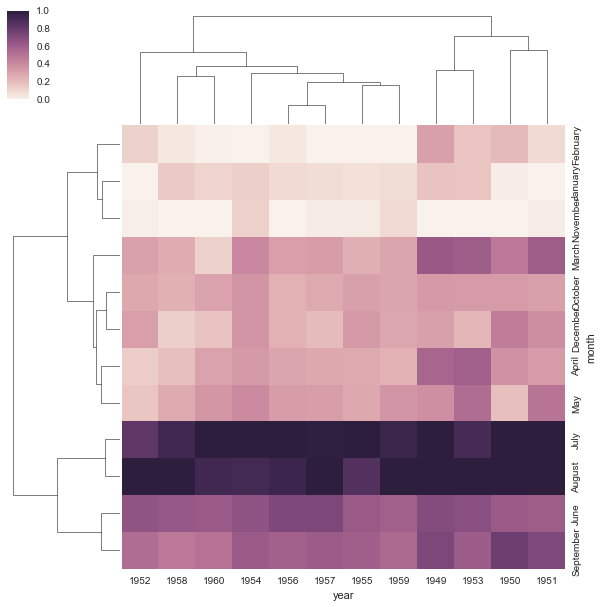

In [29]:
sns.clustermap(flight_dframe, standard_scale =1)

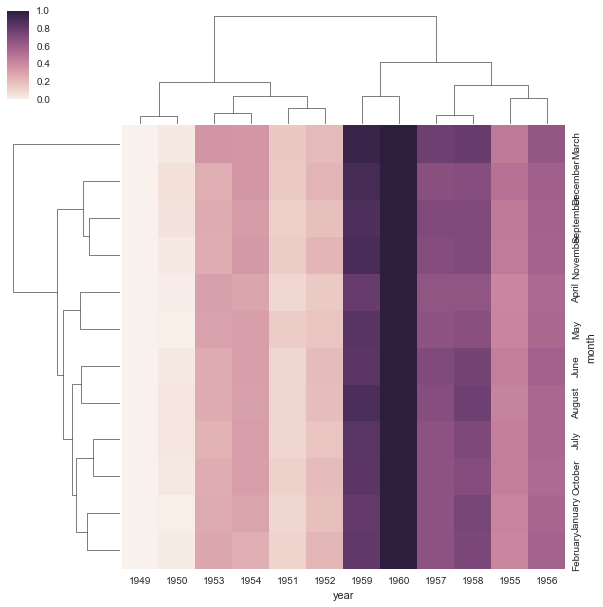

In [30]:
sns.clustermap(flight_dframe, standard_scale =0)

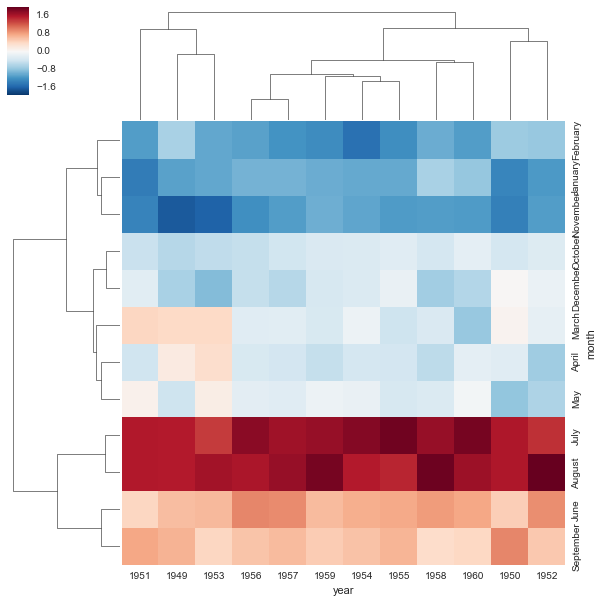

In [31]:
#zscore subtracts the mean and divides by the standard deviation of each column
#mean of 0, variance of 1
sns.clustermap(flight_dframe, z_score =1)


In [55]:
sns.axes_style()


{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0.0,
 'figure.facecolor': (1, 1, 1, 0),
 'font.family': [u'sans-serif'],
 'font.sans-serif': [u'Arial',
  u'Liberation Sans',
  u'Bitstream Vera Sans',
  u'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': u'-',
 'image.cmap': u'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': u'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': u'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': u'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

In [56]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]